# Instalation of packages

In [ ]:
# Use conda env from here: https://github.com/sbobek/lux

In [1]:
! python --version

Python 3.8.17


In [2]:
! which python

/home/mmozolewski/anaconda3/envs/luxenv/bin/./python


In [5]:
import warnings
warnings.filterwarnings('ignore')

## LUX

In [4]:
import os
print(os.getcwd())

/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama


In [ ]:
! conda install -c conda-forge nbclassic
! conda install -c anaconda chardet
! conda install -c anaconda scikit-learn

In [183]:
module_path = "/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/lux/pyuid3"  # quick-fix
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from pyuid3.data import Data
from pyuid3.uid3 import UId3

/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/lux/pyuid3


ModuleNotFoundError: No module named 'pyuid3.data'

In [184]:
module_path = "/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/lux"  # quick-fix
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from lux.lux import LUX
print(dir(LUX))

/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/lux


ModuleNotFoundError: No module named 'pyuid3.data'

In [ ]:
# %cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama
# %cd ~/

## graphviz

In [4]:
import graphviz

## rulekit

In [3]:
import numpy as np
print(np.__version__)

1.24.3


In [11]:
! conda install -c conda-forge jpype1

/bin/bash: line 1: conda: command not found


In [ ]:
# Other:
%cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/

! git clone https://github.com/adaa-polsl/RuleXAI.git
! cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/RuleXAI && sudo chown -R $USER:$USER . && rm -rf rulexai.egg-info
! cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/RuleXAI && pip install .

In [13]:
! java -version
! readlink -f $(which java)

openjdk version "17.0.4.1" 2022-08-12 LTS
OpenJDK Runtime Environment Corretto-17.0.4.9.1 (build 17.0.4.1+9-LTS)
OpenJDK 64-Bit Server VM Corretto-17.0.4.9.1 (build 17.0.4.1+9-LTS, mixed mode, sharing)
/usr/lib/jvm/java-17-amazon-corretto/bin/java


In [15]:
! yes | python -m rulekit download_jar

Fetching latest RuleKit release version:  v1.5.2
Download finished!
Package is ready to use.
yes: standard output: Broken pipe


In [16]:
! python -c "import rulekit; print(rulekit.__path__)"

['/home/mmozolewski/anaconda3/envs/luxenv/lib/python3.8/site-packages/rulekit']


In [2]:
from rulekit import RuleKit

RuleKit.init()
print(RuleKit.version)

1.5.2


In [18]:
print(dir(RuleKit))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_class_path', '_detect_jre_type', '_jar_dir_path', '_jre_type', '_launch_jvm', '_logger', '_read_versions', '_rulekit_jar_file_path', '_setup_logger', 'init', 'version']


# Iris data

In [ ]:
! conda update scikit-learn

In [44]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
from numpy import argmax, sqrt

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam

from sklearn.preprocessing import StandardScaler
# import pickle

import seaborn as sns
import copy

# from rulekit.regression import RuleRegressor
from rulekit.classification import RuleClassifier
from rulekit.params import Measures

import graphviz
from IPython.display import SVG, Image


iris = datasets.load_iris()
print(iris.keys())

iris_df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
iris_df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
iris_df['species'] = iris_df['target'].apply(lambda x: 'setosa' if x==0 else ('versicolor' if x==1 else 'virginica'))
iris_df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

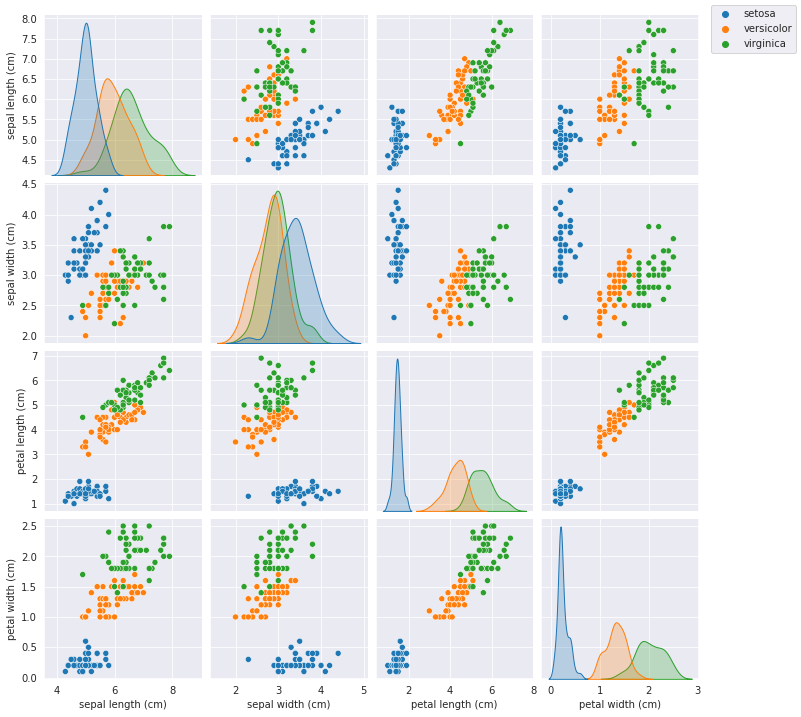

In [7]:
# Plot the pairwise relationships in the dataset
sns_plot = sns.pairplot(iris_df, vars=iris['feature_names'], hue="species")

# Move the legend on top of the plot
handles = sns_plot._legend_data.values()
labels = sns_plot._legend_data.keys()
sns_plot._legend.remove()
sns_plot.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1)
sns_plot._legend.set_bbox_to_anchor((0.9, 0.6))  # adjust the values as needed

plt.show()

## 1. "noise injection" / "noisy data augmentation".

In [18]:
NORMAL_CLASS = 'versicolor'
ANOMALY_CLASSES = ['setosa', 'virginica']
ANOMALY_CLASS_1 = ANOMALY_CLASSES[0]
ANOMALY_CLASS_2 = ANOMALY_CLASSES[1]
print(f"ANOMALY_CLASS_1 is {ANOMALY_CLASS_1}")
print(f"ANOMALY_CLASS_2 is {ANOMALY_CLASS_2}")

ANOMALY_CLASS_1 is setosa
ANOMALY_CLASS_2 is virginica


In [8]:
N = 1_000
np.random.seed(2023)
gauss_df = pd.DataFrame(np.resize(np.random.normal(loc=0.0, scale=1.0, size=N*4), (N, 4)))
gauss_df

,0,1,2,3
0,0.711674,-0.324485,-1.001871,0.236251
1,-0.102160,-1.141293,2.654407,1.440605
2,0.098902,-3.121532,-1.076522,-0.325682
3,-1.035498,-0.426320,-1.029361,-0.521774
4,-0.422758,-0.099244,-1.380258,0.301903
...,...,...,...,...
995,0.601130,-0.865946,0.701802,-0.244660
996,0.437431,0.461749,-2.397914,0.842408
997,2.279782,-0.519981,-0.554635,0.669331
998,0.366023,0.452777,1.233735,-0.149967


In [21]:
normal_gauss_df = iris_df[iris_df['species'] == NORMAL_CLASS].sample(n=N, replace=True, random_state=2023)
normal_gauss_df['sepal length (cm)'] += gauss_df[0].tolist()
normal_gauss_df['sepal width (cm)'] += gauss_df[1].tolist()
normal_gauss_df['petal length (cm)'] += gauss_df[2].tolist()
normal_gauss_df['petal width (cm)'] += gauss_df[3].tolist()
normal_gauss_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
73,6.811674,2.475515,3.698129,1.436251,1.0,versicolor
75,6.497840,1.858707,7.054407,2.840605,1.0,versicolor
56,6.398902,0.178468,3.623478,1.274318,1.0,versicolor
83,4.964502,2.273680,4.070639,1.078226,1.0,versicolor
78,5.577242,2.800756,3.119742,1.801903,1.0,versicolor
...,...,...,...,...,...,...
73,6.701130,1.934054,5.401802,0.955340,1.0,versicolor
67,6.237431,3.161749,1.702086,1.842408,1.0,versicolor
98,7.379782,1.980019,2.445365,1.769331,1.0,versicolor
94,5.966023,3.152777,5.433735,1.150033,1.0,versicolor


In [34]:
N2 = 1_000
np.random.seed(20232)
gauss_df_2 = pd.DataFrame(np.resize(np.random.normal(loc=0.0, scale=1.0, size=N2*4), (N2, 4)))

anomaly_1_gauss_df_all = iris_df[iris_df['species'] == ANOMALY_CLASS_1].sample(n=N2, replace=True, random_state=20232)
anomaly_1_gauss_df_all['sepal length (cm)'] += gauss_df_2[0].tolist()
anomaly_1_gauss_df_all['sepal width (cm)'] += gauss_df_2[1].tolist()
anomaly_1_gauss_df_all['petal length (cm)'] += gauss_df_2[2].tolist()
anomaly_1_gauss_df_all['petal width (cm)'] += gauss_df_2[3].tolist()
anomaly_1_gauss_df = anomaly_1_gauss_df_all.iloc[:int(N2 / 2)]
anomaly_1_gauss_df_for_contrast_learn = anomaly_1_gauss_df_all.iloc[int(N2 / 2):]


np.random.seed(20233)
gauss_df_3 = pd.DataFrame(np.resize(np.random.normal(loc=0.0, scale=1.0, size=N2*4), (N2, 4)))

anomaly_2_gauss_df = iris_df[iris_df['species'] == ANOMALY_CLASS_2].sample(n=N2, replace=True, random_state=20232)  # TODO 20233
anomaly_2_gauss_df['sepal length (cm)'] += gauss_df_3[0].tolist()
anomaly_2_gauss_df['sepal width (cm)'] += gauss_df_3[1].tolist()
anomaly_2_gauss_df['petal length (cm)'] += gauss_df_3[2].tolist()
anomaly_2_gauss_df['petal width (cm)'] += gauss_df_3[3].tolist()
# anomaly_2_gauss_df

In [195]:
# TODO sztucze anomaly == normal + duzy gaus lub czysty gaus!!!

N3 = 500
np.random.seed(20234)
uniform_df_3 = pd.DataFrame(np.random.uniform(low=0.0, high=10.0, size=(N3, 4)),
                            columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])


## 2. Train autoencoder on normal

In [196]:
normal_gauss_df_for_contrast_learn = normal_gauss_df.iloc[:int(N / 2)]
print(f"anomaly_1_gauss_df_for_contrast_learn # ={len(anomaly_1_gauss_df_for_contrast_learn.index)}")
print(f"normal_gauss_df_for_contrast_learn # ={len(normal_gauss_df_for_contrast_learn.index)}")
print(f"uniform_df_3 # ={len(uniform_df_3.index)}")

anomaly_1_gauss_df_for_contrast_learn # =500
normal_gauss_df_for_contrast_learn # =500
uniform_df_3 # =500


In [197]:
# Normalization
anomaly_df = anomaly_1_gauss_df_for_contrast_learn
normal_df = normal_gauss_df_for_contrast_learn

combined_df = pd.concat([anomaly_df, normal_df])

scaler = StandardScaler()
# scaler.fit(combined_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())
scaler.fit(normal_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())

# anomaly_scaled = scaler.transform(anomaly_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())
anomaly_scaled = scaler.transform(uniform_df_3[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())
normal_scaled = scaler.transform(normal_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())

anomaly_data = torch.tensor(anomaly_scaled, dtype=torch.float32)
normal_data = torch.tensor(normal_scaled, dtype=torch.float32)

### train model

In [192]:
class IrisAutoencoder3(nn.Module):
    def __init__(self):
        super(IrisAutoencoder3, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 8),  # Increase complexity by adding more neurons
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(8, 4),
            nn.ReLU(True),
            nn.Linear(4, 2),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(True),
            nn.Linear(4, 8),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(8, 4),
            nn.ReLU(True)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [193]:
class ContrastiveModel(nn.Module):
    def __init__(self, autoencoder):
        super(ContrastiveModel, self).__init__()
        self.autoencoder = autoencoder

    def forward(self, x):
        return self.autoencoder(x)


In [198]:
# Inicjalizacja modelu
autoencoder = IrisAutoencoder3()
contrastive_model = ContrastiveModel(autoencoder)
contrastive_model.train()

# Criterion i optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(contrastive_model.parameters(), lr=0.0001, weight_decay=1e-5)

num_epochs = 10_000
NO_IMPROVEMENT_IN_N_STEPS = 1_000

best_model_wts = copy.deepcopy(contrastive_model.state_dict())
best_loss = float('inf')
steps_without_improvement = 0

# Tworzenie pustych list do przechowywania wartości straty
loss_values = []

# Tworzenie DataLoaderów
anomaly_loader_1 = DataLoader(TensorDataset(anomaly_data, torch.ones(anomaly_data.shape[0])), batch_size=32, shuffle=True)
# anomaly_loader_2 = DataLoader(TensorDataset(anomaly_data, torch.ones(anomaly_data.shape[0])), batch_size=32, shuffle=True)
normal_loader_1 = DataLoader(TensorDataset(normal_data, torch.zeros(normal_data.shape[0])), batch_size=32, shuffle=True)
normal_loader_2 = DataLoader(TensorDataset(normal_data, torch.zeros(normal_data.shape[0])), batch_size=32, shuffle=True)

for epoch in range(num_epochs):
    for (normal_batch1, _), (normal_batch2, _), (anomaly_batch1, _) in zip(normal_loader_1, normal_loader_2, anomaly_loader_1):
        # W kontekście uczenia kontrastowego, loss_negative jest stratą, którą chcemy minimalizować.
        # W tym konkretnym przypadku, chcemy, aby reprezentacje przykładów normalnych były jak najbliżej zera
        # (co jest reprezentowane przez torch.zeros(output_normal.shape[0], device=output_normal.device)).
        # criterion(output_normal, torch.zeros(output_normal.shape[0], device=output_normal.device)) oblicza błąd średniokwadratowy (MSE)
        # między wyjściem modelu dla normalnych przykładów (output_normal) a wektorem zer (który ma taki sam kształt jak output_normal).
        # Innymi słowy, mierzy, jak blisko wyjście modelu dla normalnych przykładów jest do zera.
        # Celem jest trenowanie modelu, aby zmniejszać tę wartość straty, zmuszając model do generowania reprezentacji,
        # które są jak najbliżej zera dla normalnych przykładów.

        output_anomaly1 = contrastive_model(anomaly_batch1)
        output_normal1 = contrastive_model(normal_batch1)
        output_normal2 = contrastive_model(normal_batch2)

        # Strata pozytywna - porównanie anomalii z normalnym
        loss_positive = criterion(output_anomaly1, output_normal1) + criterion(output_anomaly1, output_normal2)

        # Strata negatywna - porównanie normalnego z normalnym
        loss_negative = criterion(output_normal1, output_normal2)

        loss = loss_positive + 1/loss_negative
        loss_values.append(loss.item())

        if loss.item() < best_loss:
            best_loss = loss.item()
            best_model_wts = copy.deepcopy(contrastive_model.state_dict())
            steps_without_improvement = 0
        else:
            steps_without_improvement += 1

        if steps_without_improvement >= NO_IMPROVEMENT_IN_N_STEPS:
            print(f'Stopping training due to lack of improvement in last {NO_IMPROVEMENT_IN_N_STEPS} steps.')
            break

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'epoch {epoch+1}/{num_epochs}, loss={loss.item():.4f}')

    if steps_without_improvement >= NO_IMPROVEMENT_IN_N_STEPS:
        break

contrastive_model.load_state_dict(best_model_wts)


Stopping training due to lack of improvement in last 1000 steps.


<All keys matched successfully>

In [199]:
torch.save(contrastive_model.state_dict(), f'{DATA_DIRECTORY}/Iris_contrastive_model_versicolor_v7.pht')

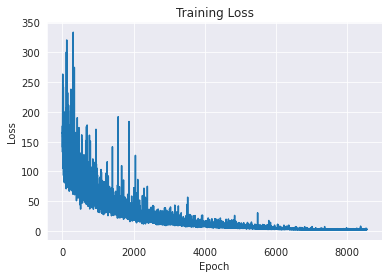

In [200]:
# After the training, plot the training loss values
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Load model

In [ ]:
### Download serialised model_iris
# ! /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama/serialised
DATA_DIRECTORY = '/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama/serialised'
# skip
# ! cd /content/jgama/ && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/IrisAutoencoder_v2c.pht
# ! cd /content/jgama/ && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/IrisAutoencoder_versicolor_v1.pht
# ! cd /content/jgama/ && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/RuleRegressor_reg_v1.pickle
# ! cd /content/jgama/ && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/RuleRegressor_reg_v2.pickle

In [201]:
# There is some problem with loading the file, one need to upload it once again manually
model_iris = ContrastiveModel(IrisAutoencoder3())
model_iris.load_state_dict(torch.load(f'{DATA_DIRECTORY}/Iris_contrastive_model_versicolor_v7.pht'))

<All keys matched successfully>

In [202]:
model_iris.eval()

ContrastiveModel(
  (autoencoder): IrisAutoencoder3(
    (encoder): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU(inplace=True)
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=8, out_features=4, bias=True)
      (4): ReLU(inplace=True)
      (5): Linear(in_features=4, out_features=2, bias=True)
      (6): ReLU(inplace=True)
    )
    (decoder): Sequential(
      (0): Linear(in_features=2, out_features=4, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=4, out_features=8, bias=True)
      (3): ReLU(inplace=True)
      (4): Dropout(p=0.2, inplace=False)
      (5): Linear(in_features=8, out_features=4, bias=True)
      (6): ReLU(inplace=True)
    )
  )
)

### 3. Test autoencoder, visualise losses and choose cutoff

In [203]:
X_normal = normal_gauss_df.iloc[int(N / 2):][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
X_anomaly_1 = anomaly_1_gauss_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
X_anomaly_2 = anomaly_2_gauss_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()

X_normal = scaler.transform(X_normal)
X_anomaly_1 = scaler.transform(X_anomaly_1)
X_anomaly_2 = scaler.transform(X_anomaly_2)

X_normal_pt = torch.FloatTensor(X_normal)
X_anomaly_1_pt = torch.FloatTensor(X_anomaly_1)
X_anomaly_2_pt = torch.FloatTensor(X_anomaly_2)

In [204]:
def print_loss(X_tensor, model, label=''):
    model.eval()
    with torch.no_grad():
        output = model(X_tensor)
        loss = criterion(output, X_tensor)

    print(f"[{label}] test Loss= {loss.item()}")


criterion = nn.MSELoss()

print_loss(X_normal_pt, model_iris, NORMAL_CLASS)
print_loss(X_anomaly_1_pt, model_iris, ANOMALY_CLASS_1)
print_loss(X_anomaly_2_pt, model_iris, ANOMALY_CLASS_2)

[versicolor] test Loss= 1.4834474325180054
[setosa] test Loss= 4.84684944152832
[virginica] test Loss= 1.5895907878875732


In [205]:
def get_losses(X_tensor, model):
    losses = []
    _criterion = nn.MSELoss()
    with torch.no_grad():
        for sample in X_tensor:
            output = model(sample)
            loss = _criterion(output, sample)
            losses.append(loss.item())

    # Choose a cutoff value
    cutoff = sum(losses) / len(losses)
    print('Cutoff Loss:', cutoff)

    return losses, cutoff

### MODEL for versicolor

Cutoff Loss: 1.483447451494634
Cutoff Loss: 4.84684978556633


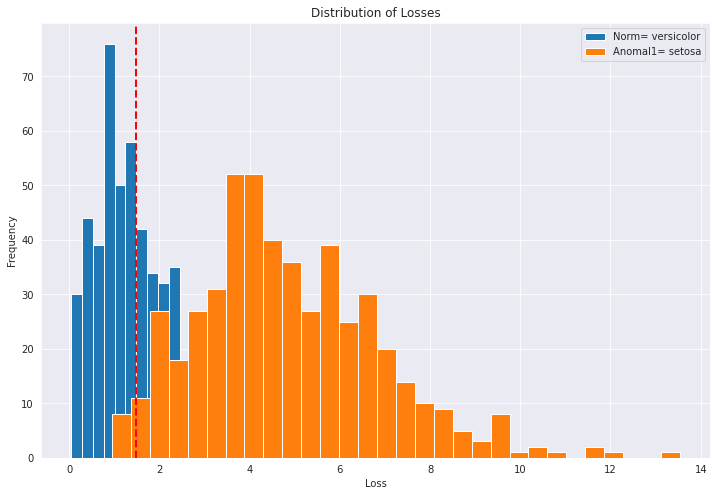

In [206]:
losses_normal, cutoff_normal = get_losses(X_normal_pt, model_iris)
losses_anomaly_1, cutoff_anomaly_1 = get_losses(X_anomaly_1_pt, model_iris)

# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.hist(losses_normal, bins=30, label=f"Norm= {NORMAL_CLASS}")
plt.hist(losses_anomaly_1, bins=30, label=f"Anomal1= {ANOMALY_CLASS_1}")
plt.axvline(cutoff_normal, color='r', linestyle='dashed', linewidth=2)

plt.title('Distribution of Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()  # add this to display the labels

plt.show()

Cutoff Loss: 1.483447451494634
Cutoff Loss: 1.5895907637737692


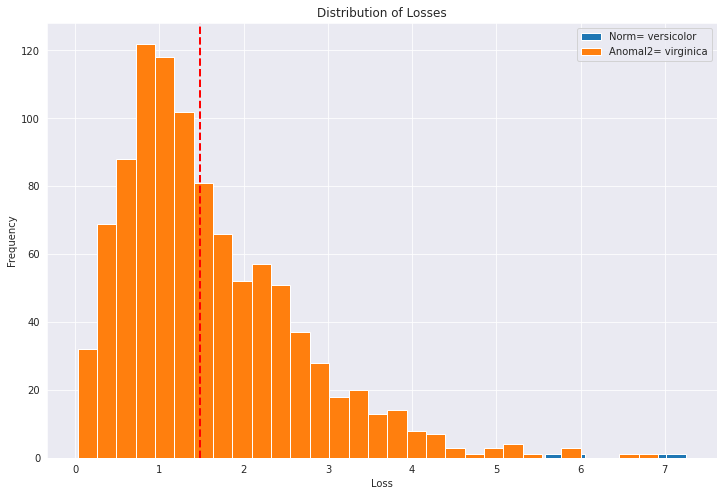

In [207]:
losses_normal, cutoff_normal = get_losses(X_normal_pt, model_iris)
losses_anomaly_2, cutoff_anomaly_2 = get_losses(X_anomaly_2_pt, model_iris)

# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.hist(losses_normal, bins=30, label=f"Norm= {NORMAL_CLASS}")
plt.hist(losses_anomaly_2, bins=30, label=f"Anomal2= {ANOMALY_CLASS_2}")
plt.axvline(cutoff_normal, color='r', linestyle='dashed', linewidth=2)

plt.title('Distribution of Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()  # add this to display the labels

plt.show()

Cutoff Loss: 1.483447451494634
Cutoff Loss: 4.84684978556633
Cutoff Loss: 1.5895907637737692


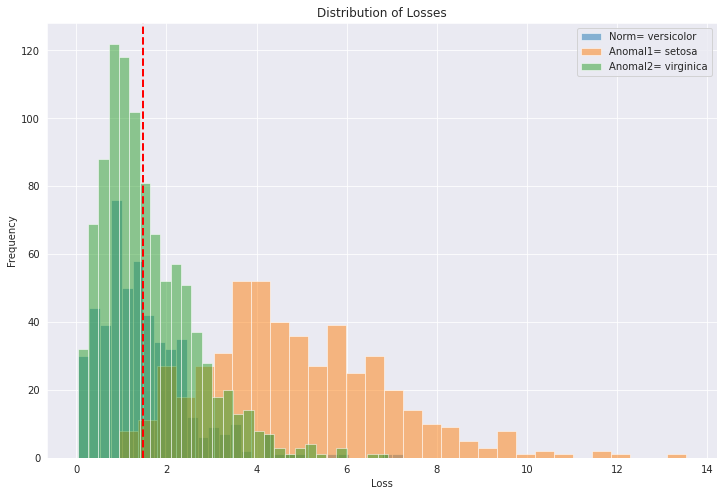

In [208]:
losses_normal, cutoff_normal = get_losses(X_normal_pt, model_iris)
losses_anomaly_1, cutoff_anomaly_1 = get_losses(X_anomaly_1_pt, model_iris)
losses_anomaly_2, cutoff_anomaly_2 = get_losses(X_anomaly_2_pt, model_iris)

# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.hist(losses_normal, bins=30, label=f"Norm= {NORMAL_CLASS}", alpha=0.5)
plt.hist(losses_anomaly_1, bins=30, label=f"Anomal1= {ANOMALY_CLASS_1}", alpha=0.5)
plt.hist(losses_anomaly_2, bins=30, label=f"Anomal2= {ANOMALY_CLASS_2}", alpha=0.5)
plt.axvline(cutoff_normal, color='r', linestyle='dashed', linewidth=2)

plt.title('Distribution of Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()  # add this to display the labels
plt.show()


In [209]:
# Concatenate to form the test set
X_test = np.concatenate((X_normal, X_anomaly_1))
y_test = np.concatenate((np.zeros(len(X_normal)), np.ones(len(X_anomaly_1))))

# Convert to tensors
X_test_pt = torch.FloatTensor(X_test)

Cutoff Loss: 3.1651486185304822
Best Threshold=2.482920, G-Mean=0.888


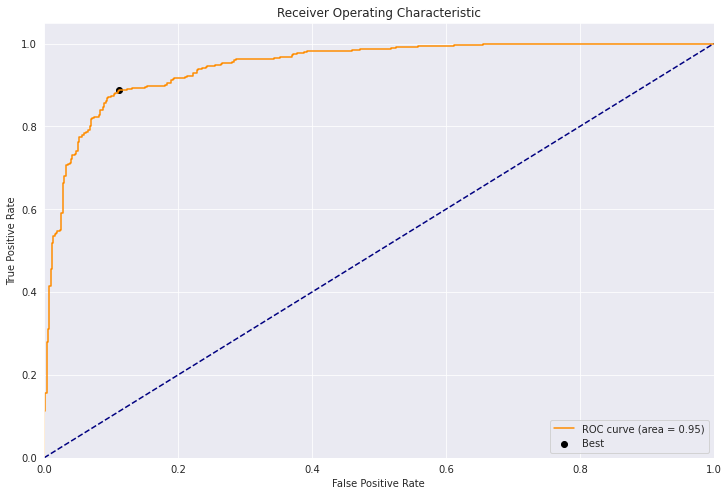

In [210]:
losses_2, _ = get_losses(X_test_pt, model_iris)  # IrisAutoencoder_versicolor_v1.pht

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, losses_2, pos_label=1)
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Plot ROC curve
# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### both anomaly classes

Cutoff Loss: 2.3773696911521256
Best Threshold=1.899307, G-Mean=0.623


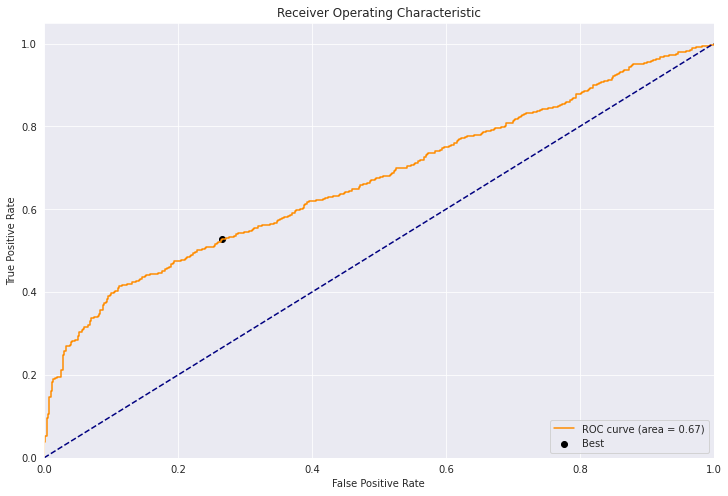

In [211]:
# Concatenate to form the test set
X_test_3 = np.concatenate((X_normal, X_anomaly_1, X_anomaly_2))
y_test_3 = np.concatenate((np.zeros(len(X_normal)), np.ones(len(X_anomaly_1)), np.ones(len(X_anomaly_2))))

# Convert to tensors
X_test_3_pt = torch.FloatTensor(X_test_3)

losses_3, _ = get_losses(X_test_3_pt, model_iris)  # IrisAutoencoder_versicolor_v1.pht

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_3, losses_3, pos_label=1)
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Plot ROC curve
# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 4. Rule-based explainer

## 4.A. Explain reconstruction loss - DELETED

## 4.B. Explain class

## Ordinary DecisionTreeClassifier

In [212]:
# Iris_contrastive_model_versicolor_v5.pht :
LOSS_THRESHOLD = 2.482920

y_test_pred = [0.0 if l < LOSS_THRESHOLD else 1.0 for l in losses_2]
y_test_pred_names = ['normal (versicolor)' if l < LOSS_THRESHOLD else 'anomaly' for l in losses_2]

confusion = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}, samples={}\n'.format(accuracy_score(y_test, y_test_pred), len(y_test)))

Confusion Matrix

[[444  56]
 [ 56 444]]

Accuracy: 0.89, samples=1000



In [215]:
# Iris_contrastive_model_versicolor_v5.pht :
# LOSS_THRESHOLD_3 = 1.899307 # ale tego nie znamy
LOSS_THRESHOLD_3 = LOSS_THRESHOLD

y_test_3_pred = [0.0 if l < LOSS_THRESHOLD_3 else 1.0 for l in losses_3]
y_test_3_pred_names = ['normal (versicolor)' if l < LOSS_THRESHOLD_3 else 'anomaly' for l in losses_3]

confusion = confusion_matrix(y_test_3, y_test_3_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}, samples={}\n'.format(accuracy_score(y_test_3, y_test_3_pred), len(y_test_3)))

Confusion Matrix

[[444  56]
 [883 617]]

Accuracy: 0.53, samples=2000



In [216]:
# we simulate that we only know normal and anomaly_1 ??
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_test_3, y_test_3_pred_names)

# Print the rules
rules_classifier = export_text(classifier, feature_names=iris.feature_names)
print(rules_classifier)

|--- petal length (cm) <= -1.73
|   |--- sepal length (cm) <= -0.03
|   |   |--- petal length (cm) <= -1.93
|   |   |   |--- class: anomaly
|   |   |--- petal length (cm) >  -1.93
|   |   |   |--- class: anomaly
|   |--- sepal length (cm) >  -0.03
|   |   |--- petal length (cm) <= -2.51
|   |   |   |--- class: anomaly
|   |   |--- petal length (cm) >  -2.51
|   |   |   |--- class: normal (versicolor)
|--- petal length (cm) >  -1.73
|   |--- sepal length (cm) <= -1.24
|   |   |--- petal width (cm) <= -0.25
|   |   |   |--- class: anomaly
|   |   |--- petal width (cm) >  -0.25
|   |   |   |--- class: anomaly
|   |--- sepal length (cm) >  -1.24
|   |   |--- petal length (cm) <= 2.67
|   |   |   |--- class: normal (versicolor)
|   |   |--- petal length (cm) >  2.67
|   |   |   |--- class: anomaly



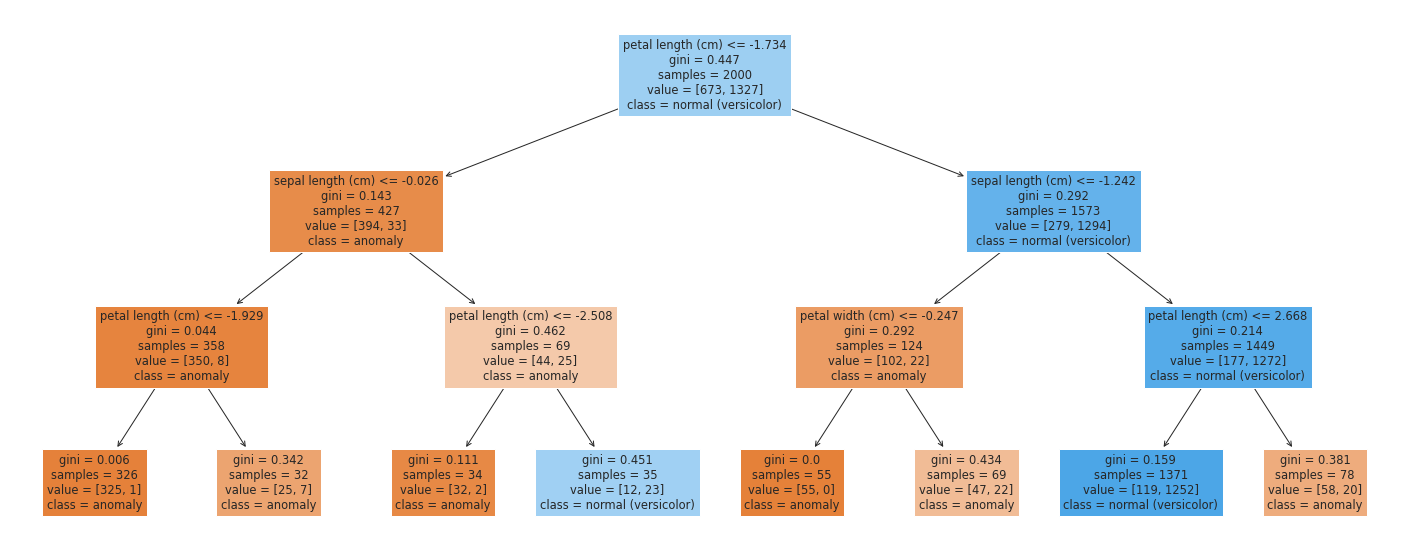

In [217]:
plt.figure(figsize=(25,10))  # Set the figure size
plot_tree(classifier, feature_names=iris.feature_names, class_names=classifier.classes_, filled=True)
plt.show()

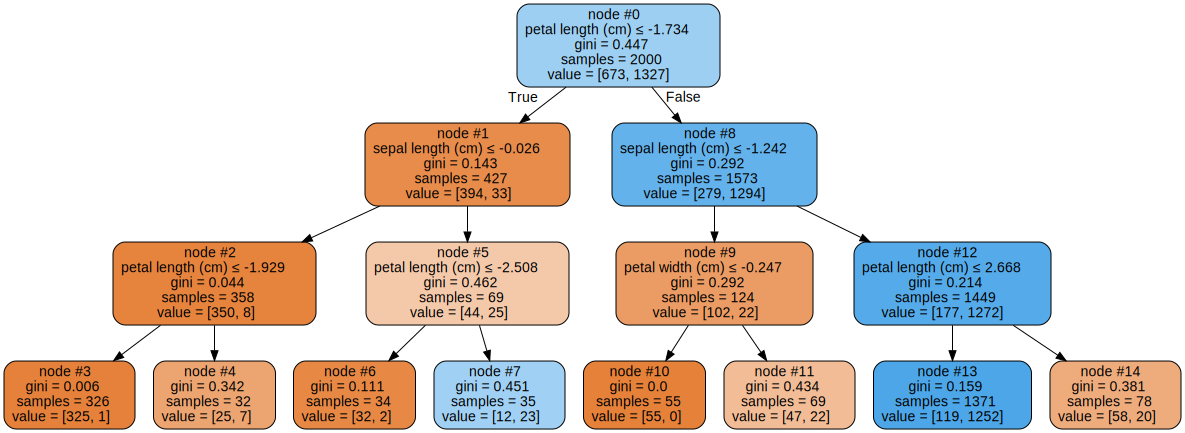

In [218]:
dot_data_3 = tree.export_graphviz(classifier, out_file=None,
                                feature_names=iris.feature_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                node_ids=True)

graphviz.Source(dot_data_3, format='svg')

### Take into account margin around Treshold - DELETED

## Rulekit for recoded loss

In [174]:
rule_kit_clf = RuleClassifier(
    induction_measure=Measures.RSS,
    pruning_measure=Measures.RSS,
    voting_measure=Measures.RSS,
)
rule_kit_clf.fit(X_test_3, y_test_3_pred)

# prediction = rule_kit_clf.predict(X_test_3)
# print(prediction)

java.lang.NoClassDefFoundError: java.lang.NoClassDefFoundError: Could not initialize class org.mockito.internal.creation.cglib.ClassImposterizer$3

In [ ]:
for i, rule in enumerate(rule_kit_clf.model.rules):
    print(f"---------------- {i+1} ----------------  ")
    print(rule, rule.stats)

## LUX (Sz. Bobek package)

In [175]:
_feature_names = [n.replace(' ', '_').replace('(', '').replace(')', '') for n in iris.feature_names]
print(_feature_names)

test_3_df = pd.DataFrame(X_test_3, columns=_feature_names)
test_3_df['target'] = [0 if y==0.0 else 1 for y in y_test_3_pred]
test_3_df

['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,-0.965241,0.399056,1.249306,2.106678,0
1,0.738285,0.614147,0.920476,0.373314,0
2,0.061136,0.062191,1.570358,0.961838,0
3,1.267686,-1.183521,1.542991,2.175174,1
4,0.044460,-1.294833,0.677073,-0.053922,1
...,...,...,...,...,...
1995,-0.121082,-1.220044,1.624719,2.536759,1
1996,-0.249622,0.510028,0.171938,1.518849,0
1997,1.028664,-0.175346,2.460808,-0.045800,1
1998,-0.378144,-1.185964,1.458187,1.292829,1


In [176]:
#pick some instance from datasetr
iris_instance = test_3_df[_feature_names].sample(1).values
iris_instance

#train lux on neighbourhood equal 20 instances
lux = LUX(predict_proba = classifier.predict_proba, neighborhood_size=20, max_depth=2,  node_size_limit = 1, grow_confidence_threshold = 0 )
lux.fit(test_3_df[_feature_names], test_3_df['target'], instance_to_explain=iris_instance, class_names=[0, 1])

#see the justification of the instance being classified for a given class
lux.justify(np.array(iris_instance))

NameError: name 'LUX' is not defined

#### Explanation on **observation level**

In [ ]:
_cfs = lux.counterfactual(np.array(iris_instance), test_3_df[_feature_names], counterfactual_representative='nearest', topn=1)
print(_cfs)

_cf = _cfs[0]
print(f"Counterfactual for {iris_instance} to change from class {lux.predict(np.array(iris_instance))[0]} to class {_cf['prediction']}: \n{_cf['counterfactual']}")

#### Explanation on **global level**

In [ ]:
lux.uid3.tree.save_dot('tree.dot',fmt='.2f',visual=True, background_data=test_delta_df)
gvz=graphviz.Source.from_file('tree.dot')
!dot -Tpng tree.dot > tree.png
Image('tree.png')

In [ ]:
# TODO

# Klase anonalna zrobic z Normal z wiekszym szumem!!

# 1. To co Gama: RIPPER, TREPAN, CORELS, IDS, BRCG
#
# 2. Domain adaption - domena sie zmienia - te same klasy do tej samej przestrzeni
# - semisupervsed ~ contrastic learning (https://adapt-python.github.io/adapt/generated/adapt.feature_based.DANN.html, https://colab.research.google.com/drive/1qCVBqEd81uMB53zakqJp4M01zXiTOrET#scrollTo=bC3ZKEa6cNfk)
# - UWAGA: wątek poboczny
#
# 3. Jak włączyć HITL? Np. ekspert mówi, że to anomalia
# - ekspertowi trzeba pomóc, wyjaśnić